# (sFigure20_part1)-Using CellphoneDB to Predict Cell-Cell Interactions Based on Ligand-Receptor Interactions.

In [1]:
import omicverse as ov
import scanpy as sc


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.10, Tutorials: https://omicverse.readthedocs.io/


In [2]:
ov.utils.ov_plot_set()

In [11]:
adata_CD8 = sc.read_h5ad('Gastric/Data/NKT/CD8_anno_new.h5ad')
adata_CD4 = sc.read_h5ad('Gastric/Data/NKT/CD4_anno_new.h5ad')
type_color_rna={
    'CD8.CXCL13+.Termianl_Tex':'C4.CD8.CXCL13+.Termianl_Tex',
    'CD8.FOS+IL7R+.T-early_response':'C6.CD8.FOS+IL7R+.T-early_response',
    'CD8.FOS+JUN+.T-early_response':'C5.CD8.FOS+JUN+.T-early_response',
    'CD8.GZMK+.Tem':'C3.CD8.GZMK+.Tem',
    'CD8.GZMK+.Tn':'C1.CD8.GZMK+.Tn',
    'CD8.GZMK+.early_Tem':'C2.CD8.GZMK+.early_Tem',
    'CD8.ISG+.T':'C7.CD8.ISG+.T',
    'CD8.KLRD1+TYROBP+.NK-like':'C11.CD8.KLRD1+TYROBP+.NK-like',
    'CD8.MAIT':'C8.CD8.MAIT',
    'CD8.ZNF683+CXCR6+.Trm':'C9.CD8.ZNF683+CXCR6+.Trm',
    'CD8.ZNF683+CXCR6-.Trm':'C10.CD8.ZNF683+CXCR6-.Trm',
    'CD8.ZNF683-CXCR6+.Trm':'C12.CD8.ZNF683-CXCR6+.Trm',
}
adata_CD8.obs['Subcelltype_ID_type']=adata_CD8.obs['Subcelltype'].map(type_color_rna).astype('category')

type_color_rna={
    'CD4.CAPG+.Tm':'C3.CD4.CAPG+.Tm',
    'CD4.CAPG+CREM-.Tm':'C4.CD4.CAPG+CREM-.Tm',
    'CD4.ADSL+.Tn':'C6.CD4.ADSL+.Tn',
    'CD4.IL21+.Tfh':'C7.CD4.IL21+.Tfh',
    'CD4.IL26+.Th17':'C9.CD4.IL26+.Th17',
    'CD4.LAG3+.Treg':'C10.CD4.LAG3+.Treg',
    'CD4.TNF+.T':'C2.CD4.TNF+.T',
    'CD4.TNFRSF9+.Treg':'C11.CD4.TNFRSF9+.Treg',
    'CD4.TOX2+.Tfh':'C8.CD4.TOX2+.Tfh',
    'CD4.Tn':'C1.CD4.Tn',
    'CD4.TMP1+.Tm':'C5.CD4.TMP1+.Tm',
}
adata_CD4.obs['Subcelltype_ID_type']=adata_CD4.obs['Subcelltype'].map(type_color_rna).astype('category')
adata_CD4,adata_CD8

(AnnData object with n_obs × n_vars = 6816 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
     uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap'
     obsm: 'X_pca', 'X_scVI', 'X_umap'
     layers: 'counts'
     obsp: 'connectivities', 'distances',
 AnnData object with n_obs × n_vars = 6184 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
     uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden'

In [12]:
import anndata as ad
adata_CD4.uns['Subcelltype_ID_type_colors'] = adata_CD4.uns['Subcelltype_colors']
adata_CD8.uns['Subcelltype_ID_type_colors'] = adata_CD8.uns['Subcelltype_colors']
adata = ad.concat([adata_CD4,adata_CD8])
adata

AnnData object with n_obs × n_vars = 13000 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'

In [13]:
adata_Epi=sc.read_h5ad('Gastric/Data/Epi_anno.h5ad')
adata_Epi.obs['Subcelltype_ID_type'] = adata_Epi.obs['Epi_celltype']
adata_Epi.uns['Subcelltype_ID_type_colors'] = [ov.pl.blue_color[2],ov.pl.blue_color[3],ov.pl.red_color[4],ov.pl.blue_color[5],
                                  ov.pl.red_color[0],ov.pl.red_color[2],ov.pl.red_color[1]]
print(adata_Epi.obs['Subcelltype_ID_type'].cat.categories),


Index(['PMC', 'PC', 'IM_PC', 'PG', 'IM_PG', 'IM_Enterocytes', 'IM_Goblet'], dtype='object')


(None,)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)
computing score 'Lipometabolism pathway'
    finished: added
    'Lipometabolism pathway', score of gene set (adata.obs).
    150 total control genes are used. (0:00:00)


[<AxesSubplot: title={'center': 'Lipometabolism pathway'}, xlabel='X_umap1', ylabel='X_umap2'>,
 <AxesSubplot: title={'center': 'Sample'}, xlabel='X_umap1', ylabel='X_umap2'>]

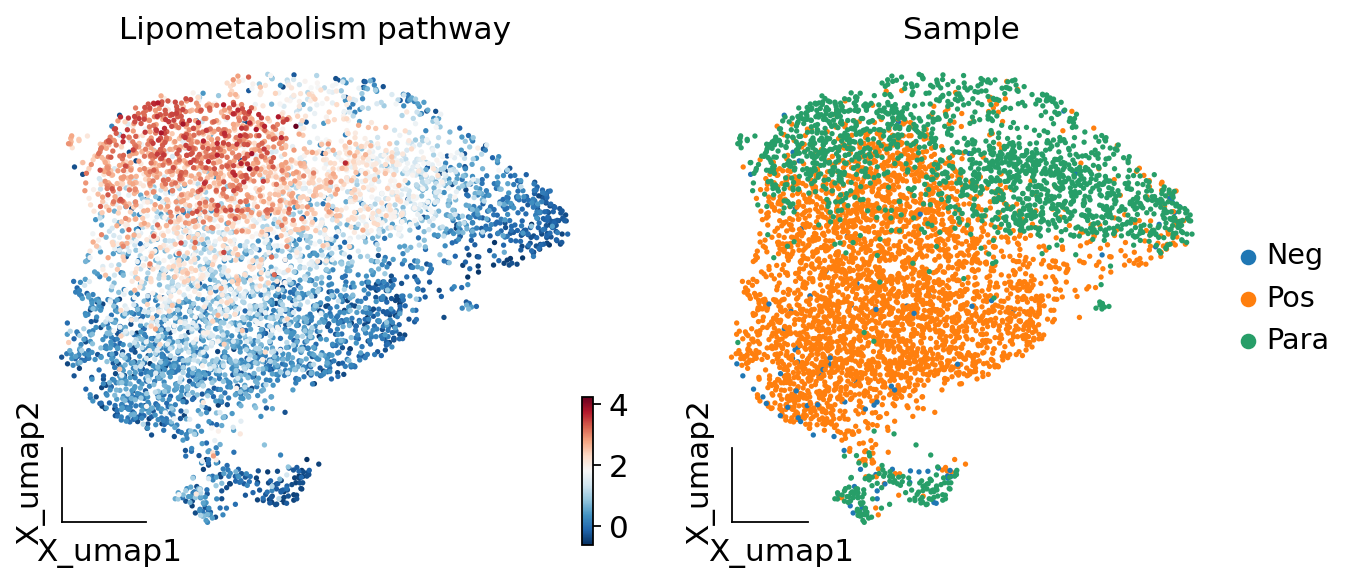

In [14]:
adata_Enterocytes = adata_Epi[adata_Epi.obs['Epi_celltype'].isin(['IM_Enterocytes'])].copy()

sc.pp.neighbors(adata_Enterocytes, use_rep="X_scVI", metric="cosine",n_neighbors=15, random_state = 112)
#sc.tl.leiden(Epi,resolution=1)
sc.tl.paga(adata_Enterocytes)
sc.pl.paga(adata_Enterocytes, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_Enterocytes,init_pos='paga')


pathway_dict=ov.utils.geneset_prepare('Gastric/Reference/genesets/GO_Biological_Process_2021.txt',organism='Human')
select_gene =  pathway_dict['regulation of intestinal lipid absorption (GO:1904729)']
sc.tl.score_genes(adata_Enterocytes, select_gene, score_name='Lipometabolism pathway')
ov.pl.embedding(adata_Enterocytes,
                basis='X_umap',
                color=['Lipometabolism pathway','Sample',],
                frameon='small',cmap='RdBu_r',
                show=False,)

In [15]:
adata_Enterocytes.obs['Lipometabolism_type'] = 'Enterocytes (Normal)'
adata_Enterocytes.obs.loc[adata_Enterocytes.obs['Lipometabolism pathway']>2,'Lipometabolism_type']='Enterocytes (lipometabolism)'

In [16]:
print(adata_Epi.obs['Subcelltype_ID_type'].cat.categories),
adata_Epi.obs['Subcelltype_ID_type'] = adata_Epi.obs['Subcelltype_ID_type'].cat.remove_categories(['IM_Enterocytes'])
adata_Epi.obs['Subcelltype_ID_type'] = adata_Epi.obs['Subcelltype_ID_type'].cat.add_categories(['Enterocytes (lipometabolism)','Enterocytes (Normal)'])
print(adata_Epi.obs['Subcelltype_ID_type'].cat.categories)


Index(['PMC', 'PC', 'IM_PC', 'PG', 'IM_PG', 'IM_Enterocytes', 'IM_Goblet'], dtype='object')
Index(['PMC', 'PC', 'IM_PC', 'PG', 'IM_PG', 'IM_Goblet',
       'Enterocytes (lipometabolism)', 'Enterocytes (Normal)'],
      dtype='object')


In [17]:
adata_Epi.obs.loc[adata_Enterocytes.obs_names,'Subcelltype_ID_type'] = adata_Enterocytes.obs['Lipometabolism_type']
adata_Epi.obs['Subcelltype_ID_type']

AAACCTGAGACCTAGG-1_0                               PC
AAACCTGAGACGCACA-1_0             Enterocytes (Normal)
AAACCTGAGCTCCTCT-1_0                               PC
AAACCTGAGGCTCAGA-1_0                              PMC
AAACCTGCACTTAAGC-1_0                              PMC
                                     ...             
TTTGTCAAGGTGCAAC-1_11                              PC
TTTGTCAAGGTGCACA-1_11            Enterocytes (Normal)
TTTGTCACAAGAGGCT-1_11    Enterocytes (lipometabolism)
TTTGTCATCGGCGGTT-1_11            Enterocytes (Normal)
TTTGTCATCTCGATGA-1_11    Enterocytes (lipometabolism)
Name: Subcelltype_ID_type, Length: 26265, dtype: category
Categories (8, object): ['PMC' < 'PC' < 'IM_PC' < 'PG' < 'IM_PG' < 'IM_Goblet' < 'Enterocytes (lipometabolism)' < 'Enterocytes (Normal)']

In [18]:
adata = ad.concat([adata,adata_Epi])
adata

AnnData object with n_obs × n_vars = 39265 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'Subcelltype_ID_type'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'

In [19]:
adata = adata.raw.to_adata()
adata.write_h5ad('Gastric/Scripts_For_Github/data/phone/adata_norm_log.h5ad',compression='gzip')

In [20]:
import pandas as pd
#meta导出
df_meta = pd.DataFrame(data={'Cell':list(adata.obs.index),
                             'cell_type':[ i for i in adata.obs['Subcelltype_ID_type']]
                            })
df_meta.set_index('Cell', inplace=True)
df_meta.to_csv('Gastric/Scripts_For_Github/data/phone/meta.tsv', sep = '\t')

In [22]:
import os
cpdb_file_path = 'Gastric/Reference/cellphonedb-data/cellphonedb.zip'
meta_file_path = os.getcwd()+'/data/phone/meta.tsv'
counts_file_path = os.getcwd()+'/data/phone/adata_norm_log.h5ad'
microenvs_file_path = None
out_path =os.getcwd()+'/data/phone/adata_cellphone/'

In [23]:
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

cpdb_results = cpdb_statistical_analysis_method.call(
    cpdb_file_path = cpdb_file_path,                 # mandatory: CellPhoneDB database zip file.
    meta_file_path = meta_file_path,                 # mandatory: tsv file defining barcodes to cell label.
    counts_file_path = counts_file_path,             # mandatory: normalized count matrix.
    counts_data = 'hgnc_symbol',                     # defines the gene annotation in counts matrix.
    microenvs_file_path = microenvs_file_path,       # optional (default: None): defines cells per microenvironment.
    iterations = 1000,                               # denotes the number of shufflings performed in the analysis.
    threshold = 0.1,                                   # defines the min % of cells expressing a gene for this to be employed in the analysis.
    threads = 4,                                     # number of threads to use in the analysis.
    debug_seed = 42,                                 # debug randome seed. To disable >=0.
    result_precision = 3,                            # Sets the rounding for the mean values in significan_means.
    pvalue = 0.05,                                   # P-value threshold to employ for significance.
    subsampling = False,                             # To enable subsampling the data (geometri sketching).
    subsampling_log = False,                         # (mandatory) enable subsampling log1p for non log-transformed data inputs.
    subsampling_num_pc = 100,                        # Number of componets to subsample via geometric skectching (dafault: 100).
    subsampling_num_cells = 1000,                    # Number of cells to subsample (integer) (default: 1/3 of the dataset).
    separator = '|',                                 # Sets the string to employ to separate cells in the results dataframes "cellA|CellB".
    debug = False,                                   # Saves all intermediate tables employed during the analysis in pkl format.
    output_path = out_path,                          # Path to save results.
    output_suffix = None                             # Replaces the timestamp in the output files by a user defined string in the  (default: None).
    )

Reading user files...
The following user files were loaded successfully:
/storage/zengjianyangLab/hulei/Gastric/Scripts_For_Github/data/phone/adata_norm_log.h5ad
/storage/zengjianyangLab/hulei/Gastric/Scripts_For_Github/data/phone/meta.tsv
[ ][CORE][04/06/24-21:33:38][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:42 Threads:4 Precision:3
[ ][CORE][04/06/24-21:33:38][WARNING] Debug random seed enabled. Set to 42
[ ][CORE][04/06/24-21:33:40][INFO] Running Real Analysis
[ ][CORE][04/06/24-21:33:41][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [04:38<00:00,  3.59it/s]

[ ][CORE][04/06/24-21:38:19][INFO] Building Pvalues result


[ ][CORE][04/06/24-21:38:21][INFO] Building results
Saved deconvoluted to /storage/zengjianyangLab/hulei/Gastric/Scripts_For_Github/data/phone/adata_cellphone/statistical_analysis_deconvoluted_06_04_2024_213822.txt
Saved deconvoluted_percents to /storage/zengjianyangLab/hulei/Gastric/Scripts_For_Github/data/phone/adata_cellphone/statistical_analysis_deconvoluted_percents_06_04_2024_213822.txt
Saved means to /storage/zengjianyangLab/hulei/Gastric/Scripts_For_Github/data/phone/adata_cellphone/statistical_analysis_means_06_04_2024_213822.txt
Saved pvalues to /storage/zengjianyangLab/hulei/Gastric/Scripts_For_Github/data/phone/adata_cellphone/statistical_analysis_pvalues_06_04_2024_213822.txt
Saved significant_means to /storage/zengjianyangLab/hulei/Gastric/Scripts_For_Github/data/phone/adata_cellphone/statistical_analysis_significant_means_06_04_2024_213822.txt


In [24]:
deconvoluted = cpdb_results['deconvoluted']
means = cpdb_results['means']
pvalues = cpdb_results['pvalues']
significant_means = cpdb_results['significant_means']

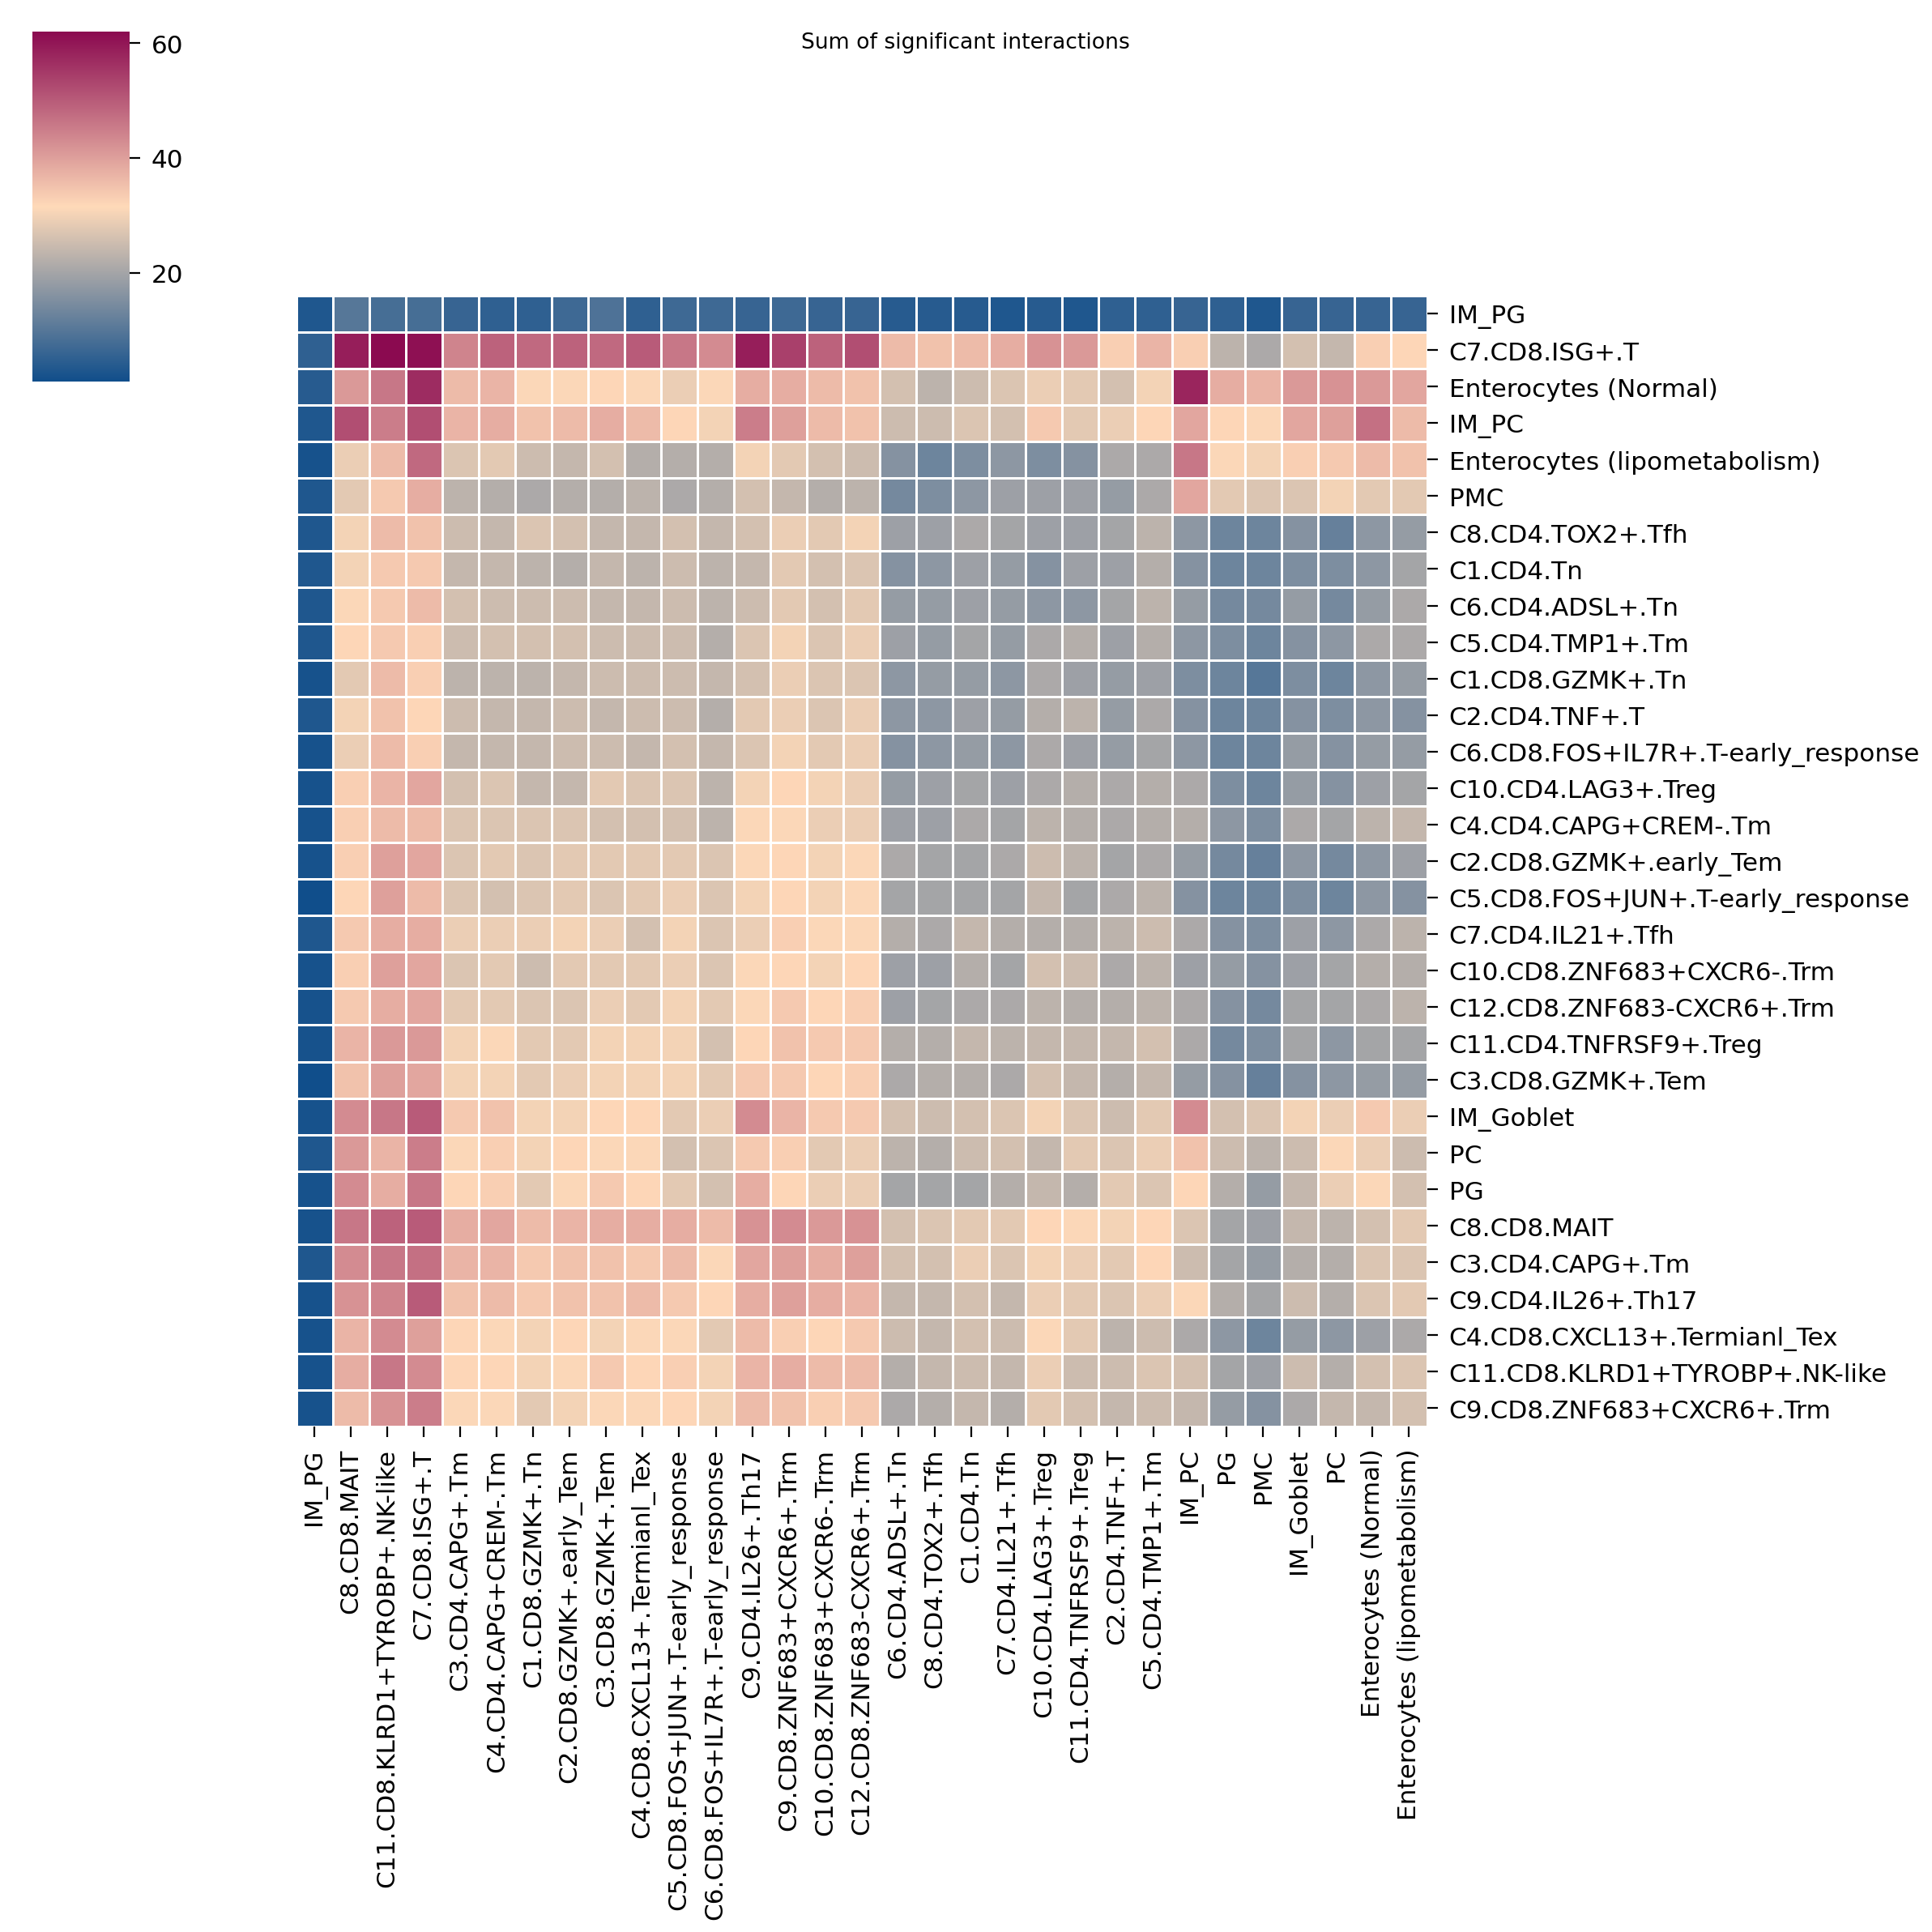

In [28]:
import ktplotspy as kpy
import matplotlib.pyplot as plt
kpy.plot_cpdb_heatmap(
    pvals=pvalues,
    figsize=(15, 15),
    title="Sum of significant interactions",
    symmetrical=False,
)
plt.savefig('Gastric/Figure/sFigure20/sFigure20_A.png', dpi=300,bbox_inches = 'tight')